In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk
import seaborn as sns


In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4642,ham,Sorry i din lock my keypad.,NaN,NaN,NaN
337,ham,Just sleeping..and surfing,NaN,NaN,NaN
4363,ham,So what about you. What do you remember,NaN,NaN,NaN
3959,ham,I sent lanre fakeye's Eckankar details to the ...,NaN,NaN,NaN
2848,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

#1.Data Cleaning
#2.EDA
#3.Text Processing
#4.Model Building
#5.Evaluation
#6.Website
#7.Deploy

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(5)

,v1,v2
1203,ham,Thanks for understanding. I've been trying to ...
1819,ham,Dunno dat's wat he told me. Ok lor...
5422,ham,Ok k..sry i knw 2 siva..tats y i askd..
3204,ham,"Oh, yes, I've just been a little under the wea..."
1314,ham,Got but got 2 colours lor. One colour is quite...


In [7]:
#Renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
775,ham,Thanks for picking up the trash.
5331,ham,X course it 2yrs. Just so her messages on mess...
89,ham,"Ela kano.,il download, come wen ur free.."
1381,ham,We spend our days waiting for the ideal path t...
1779,spam,"Loan for any purpose å£500 - å£75,000. Homeown..."


In [8]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [11]:
#Remove duplicates#
df=df.drop_duplicates(keep='first')

In [12]:
print(df.duplicated().sum())
print(df.shape)

0
(5169, 2)


# 2.EDA

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

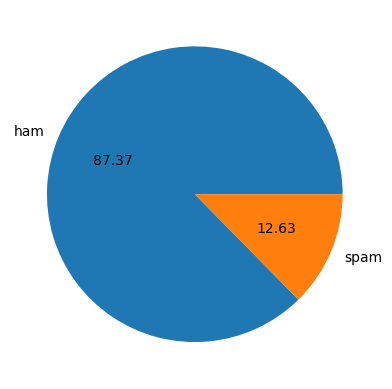

In [15]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
#data is imbalanced
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sandilyapanda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_characters']=df['text'].apply(len)

In [18]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
#num of words
nltk.download('punkt_tab')
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sandilyapanda/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [20]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
df['num_sentences']=df['text'].apply(lambda x:nltk.sent_tokenize(x))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl..."
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar..."


In [22]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words
count,5169.000000,5169.000000
mean,78.977945,18.455794
std,58.236293,13.324758
min,2.000000,1.000000
25%,36.000000,9.000000
50%,60.000000,15.000000
75%,117.000000,26.000000
max,910.000000,220.000000


In [23]:
#Ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words
count,4516.000000,4516.000000
mean,70.459256,17.123782
std,56.358207,13.493970
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,22.000000
max,910.000000,220.000000


In [24]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words
count,653.000000,653.000000
mean,137.891271,27.667688
std,30.137753,7.008418
min,13.000000,2.000000
25%,132.000000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


<Axes: xlabel='num_characters', ylabel='Count'>

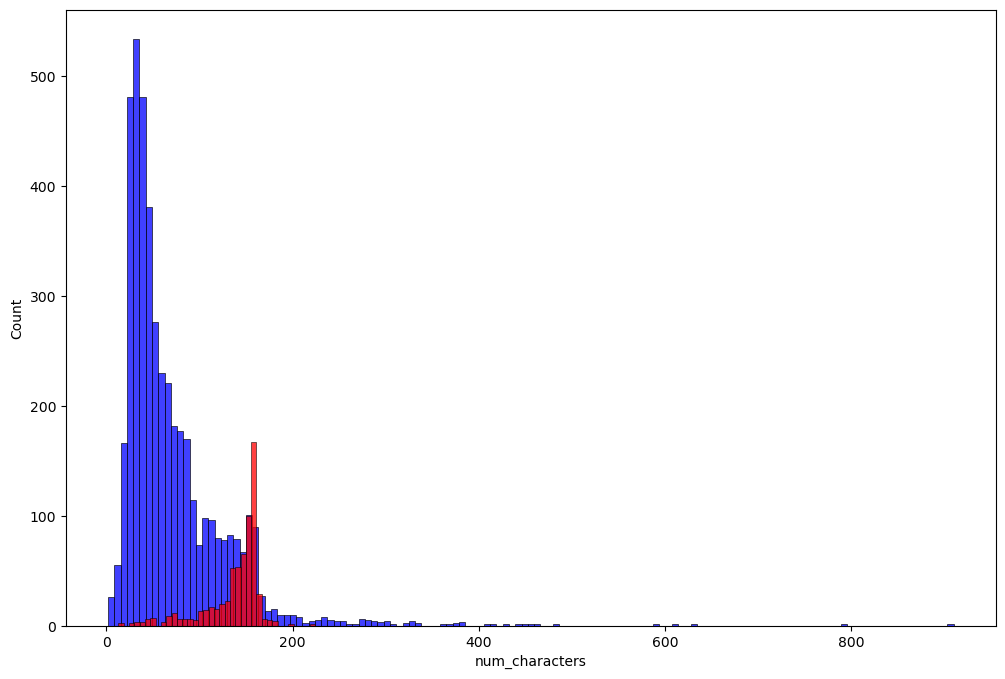

In [25]:

plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'], color='blue', label='Ham')
sns.histplot(df[df['target']==1]['num_characters'], color='red', label='Spam')


<Axes: xlabel='num_words', ylabel='Count'>

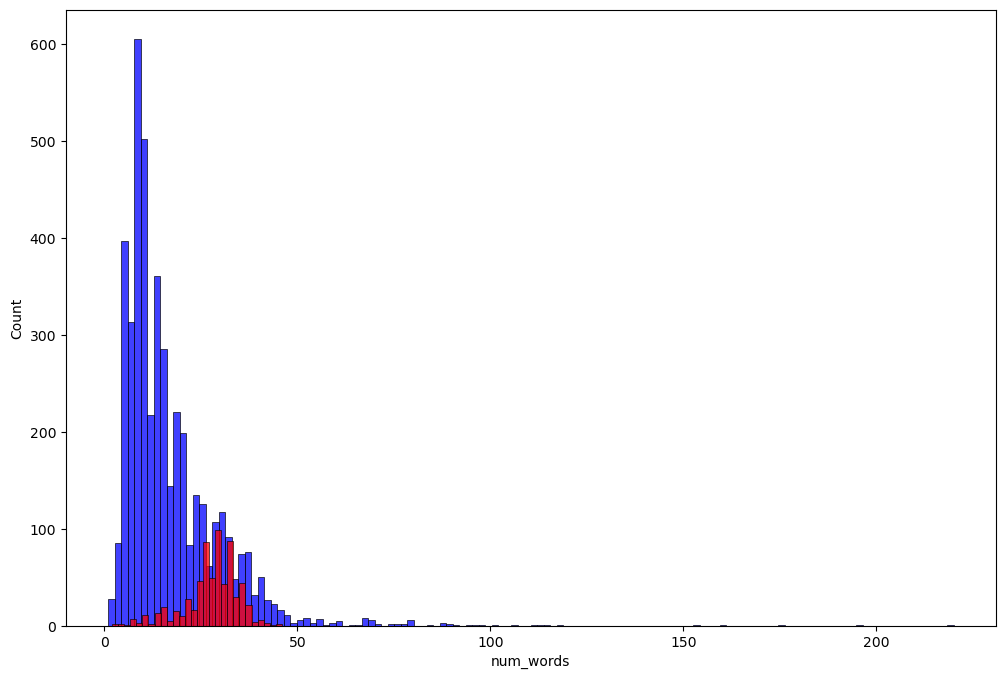

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'], color='blue', label='Ham')
sns.histplot(df[df['target']==1]['num_words'], color='red', label='Spam')


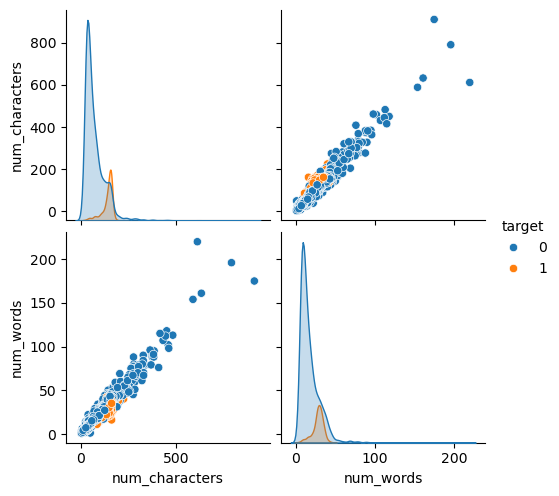

In [27]:
sns.pairplot(df,hue='target')

<Axes: >

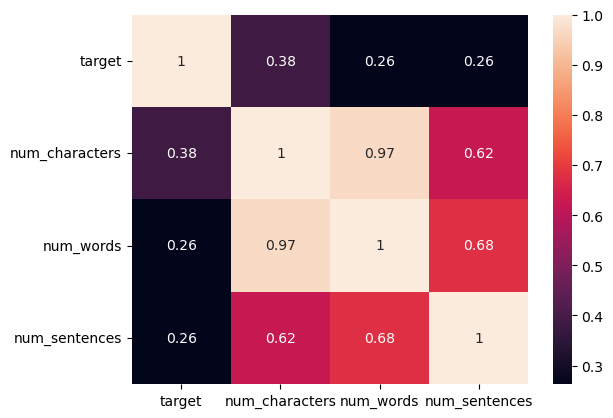

In [28]:
#here the code was sns.heatmap(df.corr(),annot=True) raising error
#below is the chat gpt one (0.63 k jagah 0.62 arra he)

df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

df[['num_characters','num_words','num_sentences']].describe()

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)


## 3.Data Preprocessing 
    -Lower case 
    -Tokenization
    -Removing special character 
    -Removing stop words and punctuation
    -Stemming
    

In [29]:
#modified a bit as raising error
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [30]:
import nltk
nltk.download('stopwords')


transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sandilyapanda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [31]:
df['text'][10]



"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [32]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [33]:
df['transformed_text']=df['text'].apply(transform_text)

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
!pip install wordcloud


from wordcloud import WordCloud 
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [36]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

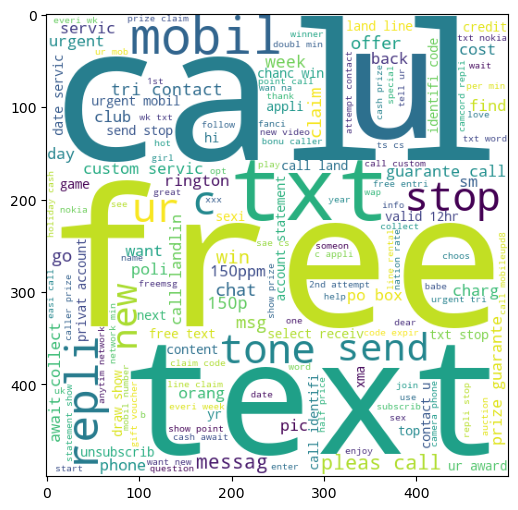

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [38]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

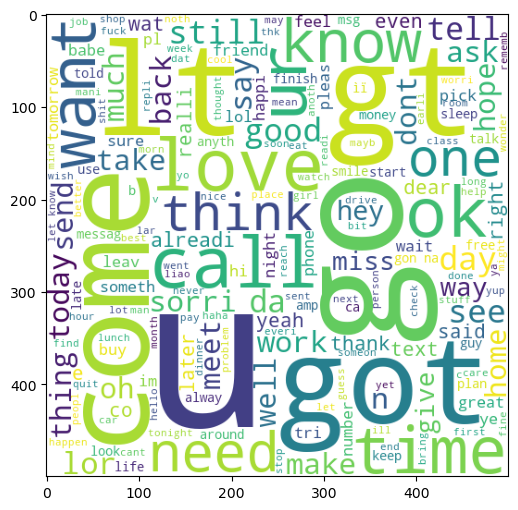

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus) #but output in the video is coming as 9941

9939

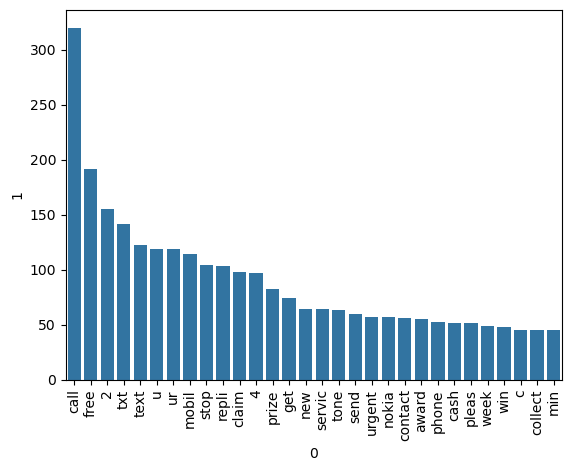

In [43]:
#done modification because raising error after executing the video code block 
from collections import Counter 
# Convert the Counter results to a DataFrame for easier plotting
most_common_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
# Use named parameters x and y instead of positional arguments
sns.barplot(x=most_common_df[0], y=most_common_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus) #in video it is coming 35303

35404

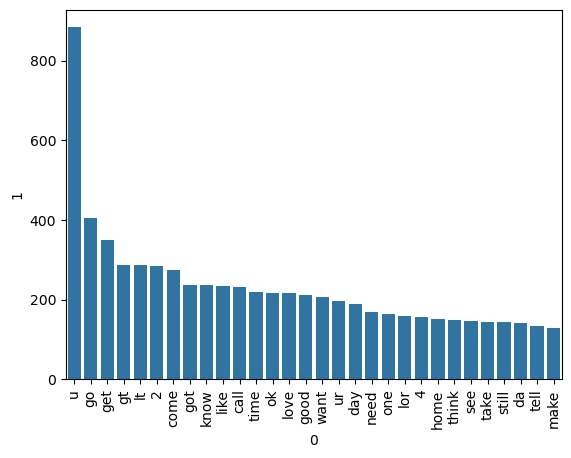

In [46]:
from collections import Counter 
# Convert the Counter results to a DataFrame for easier plotting
most_common_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
# Use named parameters x and y instead of positional arguments
sns.barplot(x=most_common_df[0], y=most_common_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
#Text Vectorization
#using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4.Model Building 

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [49]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [50]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
print(X.shape) #output in the video (5169,6677)


(5169, 3000)


In [51]:
y = df['target'].values

In [52]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [57]:
#output is varying a bit
gnb.fit(X_train,y_train) 
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [58]:
#output is varying a bit
#we will use this because precision is best 
mnb.fit(X_train,y_train) 
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [59]:
#output is varying a bit
bnb.fit(X_train,y_train) 
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [60]:
#tfidf ->mnb
!pip install xgboost


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [62]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)  


In [63]:
clfs={'SVC':svc,
      'KN':knc,
      'NB':mnb,
      'DT':dtc,
      'LR':lrc,
      'RF':rfc,
      'AdaBoost':abc,
      'BgC':bc,
      'ETC':etc,
      'GBDT':gbdt,
      'xgb':xgb
}

In [64]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [65]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [66]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [67]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)


In [68]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [69]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

In [70]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


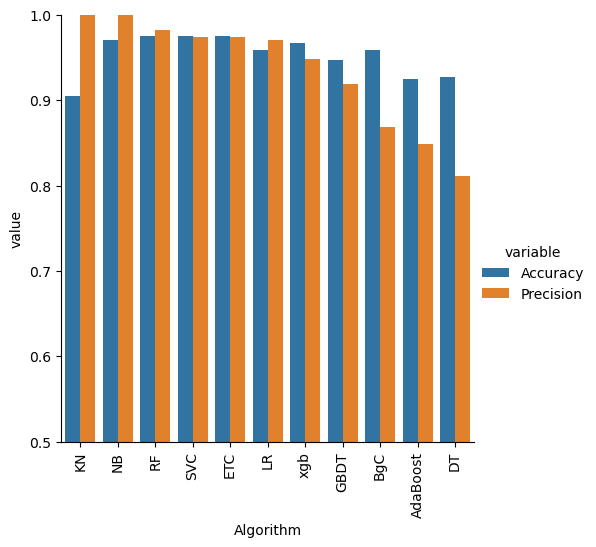

In [71]:
#output is same but format is different 
sns.catplot(x='Algorithm',y='value',
            hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [72]:
#model improve
#change the max feature parameter of TfIdf

In [73]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [74]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [75]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [76]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [77]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837


In [78]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [79]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [80]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [81]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [82]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [83]:
from sklearn.ensemble import StackingClassifier

In [84]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [85]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [86]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))